In [1]:
import sys
# set python syspath to point out location of our self-writing module
sys.path.append("/home/ponshane/work_dir/CLTM/src/codebase/")

#import pickle

from gensim.models.wrappers import LdaMallet
from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim
import logging
from topic_utilities import *
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

# Build monolingual topic model on 25K pairs (50K docs)

In [2]:
file = open("/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/50K-sampled-docs/selected50KDos.txt",
            'r')

chinese_docs = []
english_docs = []
for idx, doc in enumerate(file.readlines()):
    if idx % 2 != 0:
        chinese_docs.append(doc.replace("\n", "").split(" "))
    else:
        english_docs.append(doc.replace("\n", "").split(" "))

In [18]:
# save to pkl
'''
f = open('../../Pickle_Folders/2018-09-28-ponshane-um-corpus-selected-50k.pkl', 'wb')
pickle.dump((chinese_docs, english_docs), f)
f.close()
'''

In [3]:
# turn our tokenized documents into a id <-> cluster_id dictionary
chinese_dictionary = corpora.Dictionary(chinese_docs)
print(chinese_dictionary)

# convert tokenized documents into a document-term matrix
chinese_corpus = [chinese_dictionary.doc2bow(text) for text in chinese_docs]

# turn our tokenized documents into a id <-> cluster_id dictionary
english_dictionary = corpora.Dictionary(english_docs)
print(english_dictionary)

# convert tokenized documents into a document-term matrix
english_corpus = [english_dictionary.doc2bow(text) for text in english_docs]

Dictionary(18449 unique tokens: ['何延忠', '励志', '劳作', '变成', '年来']...)
Dictionary(9695 unique tokens: ['desert', 'dunhuang', 'fishery', 'gansu', 'oasis']...)


In [12]:
path_of_mallet = "/home/ponshane/work_dir/Mallet/bin/mallet"

In [13]:
def compute_coherence_values(path_mallet, dictionary, corpus, texts, limit, start, step):
    """
    Reference: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    #coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(path_mallet, corpus=corpus, num_topics=num_topics,
                                                 id2word=dictionary, optimize_interval = 0, alpha = 0.1,
                                                 iterations= 1000)
        model_list.append(model)
        #coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        #coherence_values.append(coherencemodel.get_coherence())

    return model_list#, coherence_values

In [26]:
start_time = datetime.now()

cn_model_list = compute_coherence_values(path_mallet=path_of_mallet,
                                                              dictionary=chinese_dictionary,
                                                              corpus=chinese_corpus, texts=chinese_docs,
                                                              start=5, limit=10, step=5)

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:40.604572


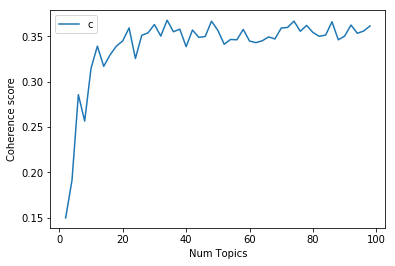

In [8]:
"""
limit=100; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, cn_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
"""

In [9]:
#print(cn_coherence_values)

[0.14963632121665782, 0.19129614672760986, 0.28555012157913456, 0.25645346380486644, 0.3146457373164942, 0.33905363503845853, 0.31679902451568953, 0.3294158628247478, 0.33911304989896146, 0.34487105502755233, 0.3591329867822343, 0.3254668155335553, 0.3510076729507994, 0.3537924327165066, 0.36290996557296895, 0.35017880542317203, 0.36761643482950473, 0.35492936645723744, 0.35777881616179397, 0.33847509811680976, 0.35682670763111074, 0.34873145515315346, 0.3496312974244628, 0.3665899999460736, 0.3565065066907074, 0.34113705883274237, 0.34642102252049894, 0.346053081088857, 0.357488702690017, 0.34468926078505263, 0.34292186136273334, 0.3449519025307821, 0.3492374225081539, 0.3469551199884139, 0.3590440073249247, 0.3596855909581559, 0.366681041835179, 0.3554646027426854, 0.36190477450212, 0.35409745872331533, 0.34985668871763337, 0.35130049894502263, 0.36584993144464456, 0.34603347799157197, 0.3501816633264402, 0.36230212466928907, 0.35320446404127986, 0.35572381708839984, 0.36138249957197

In [27]:
start_time = datetime.now()

en_model_list = compute_coherence_values(path_mallet=path_of_mallet,
                                                              dictionary=english_dictionary,
                                                              corpus=english_corpus, texts=english_docs,
                                                              start=5, limit=10, step=5)

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:36.572975


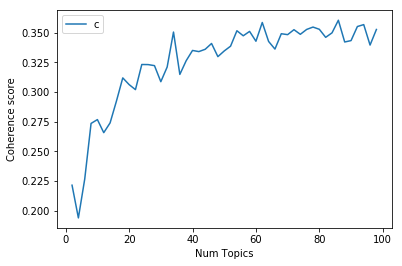

In [11]:
"""limit=100; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, en_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()"""

In [12]:
#print(en_coherence_values)

[0.2214983517588283, 0.1939202926699514, 0.22666254461852553, 0.2735618091090547, 0.2767928162188378, 0.2657690984576892, 0.274008914641446, 0.29235385026138727, 0.311941699143646, 0.3062955089776371, 0.3020465680969948, 0.3232247265864787, 0.3231490499522491, 0.3222663268598865, 0.30873107460308086, 0.3210871925214323, 0.3505659269004599, 0.31487194333895274, 0.3264175779877611, 0.33506383345840485, 0.33410431592996154, 0.33605125398521724, 0.34094236587414306, 0.3298549962378785, 0.33464088339996395, 0.33866410744919523, 0.3516705040462496, 0.3474321846656275, 0.3511234375409036, 0.34283609317216823, 0.3586354863257171, 0.3426481606591178, 0.3362268066505847, 0.3491619430942225, 0.3483940420664483, 0.3525719049338276, 0.34866275016975495, 0.3527789752275911, 0.35477830237993313, 0.3528960678831688, 0.3461196386661241, 0.3499065637645972, 0.36052704634622895, 0.3422002509146005, 0.3433665821275315, 0.3552301460650574, 0.3568450020174472, 0.3396029757485987, 0.35274507752649736]


In [14]:
# save model
"""import pickle
f = open('../out/Mallet/50K-doc-iter500-alpha01-models.pkl', 'wb')
pickle.dump((cn_model_list, cn_coherence_values, en_model_list, en_coherence_values), f)
f.close()"""

In [17]:
"""cn_optimal_model = cn_model_list[10]
en_optimal_model = en_model_list[16]
print(cn_optimal_model.num_topics, 
     en_optimal_model.num_topics)"""

22 34


In [18]:
#save optimal model
"""cn_optimal_model.save("../out/" + "50K-doc-iter500-alpha01-cn" + ".model")
en_optimal_model.save("../out/" + "50K-doc-iter500-alpha01-en" + ".model")"""
#cn_model = LdaMallet.load("./LDA_Outputs/UM/mallet-single-lda/" + cn_model_name + ".model")
#en_model = LdaMallet.load("./LDA_Outputs/UM/mallet-single-lda/" + en_model_name + ".model")
#class gensim.utils.SaveLoad¶

In [28]:
assert len(cn_model_list) == len(en_model_list)
for idx in range(0, len(cn_model_list)):
    temp_model = cn_model_list[idx]
    temp_model.save("/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/50K-sampled-docs/monolingual-lda/" + str(temp_model.num_topics) + "topics-cn" + ".model")
    temp_model = en_model_list[idx]
    temp_model.save("/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/50K-sampled-docs/monolingual-lda/" + str(temp_model.num_topics) + "topics-en" + ".model")

# Build monolingual topic model on 100K, 200K, 400K, 800K docs

In [5]:
corpus_list = ["/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/100K-sampled-docs/selected100KDos.txt",
              "/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/200K-sampled-docs/selected200KDos.txt",
              "/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/400K-sampled-docs/selected400KDos.txt",
              "/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/800K-sampled-docs/selected800KDos.txt"]
sizes = ["100K", "200K", "400K", "800K"]

for corpus_path, size in zip(corpus_list, sizes):
    file = open(corpus_path, 'r')

    chinese_docs = []
    english_docs = []
    for idx, doc in enumerate(file.readlines()):
        if idx % 2 != 0:
            english_docs.append(doc.replace("\n", "").split(" "))
        else:
            chinese_docs.append(doc.replace("\n", "").split(" "))
    
    # turn our tokenized documents into a id <-> cluster_id dictionary
    chinese_dictionary = corpora.Dictionary(chinese_docs)
    print(chinese_dictionary)

    # convert tokenized documents into a document-term matrix
    chinese_corpus = [chinese_dictionary.doc2bow(text) for text in chinese_docs]

    # turn our tokenized documents into a id <-> cluster_id dictionary
    english_dictionary = corpora.Dictionary(english_docs)
    print(english_dictionary)

    # convert tokenized documents into a document-term matrix
    english_corpus = [english_dictionary.doc2bow(text) for text in english_docs]
    
    path_of_mallet = "/home/ponshane/work_dir/Mallet/bin/mallet"
    
    chinese_model = gensim.models.wrappers.LdaMallet(path_of_mallet, corpus=chinese_corpus, num_topics=10,
                                                 id2word=chinese_dictionary, optimize_interval = 0, alpha = 0.1,
                                                 iterations= 1000)
    english_model = gensim.models.wrappers.LdaMallet(path_of_mallet, corpus=english_corpus, num_topics=10,
                                                 id2word=english_dictionary, optimize_interval = 0, alpha = 0.1,
                                                 iterations= 1000)
    
    chinese_model.save("/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/" + size + "-sampled-docs/monolingual-lda/10topics-cn.model")
    english_model.save("/home/ponshane/work_dir/CLTM-Experiments/Data/UM-Corpus/" + size + "-sampled-docs/monolingual-lda/10topics-en.model")

Dictionary(23349 unique tokens: ['何延忠', '励志', '劳作', '变成', '年来']...)
Dictionary(12927 unique tokens: ['desert', 'dunhuang', 'fishery', 'gansu', 'oasis']...)
Dictionary(27468 unique tokens: ['何延忠', '励志', '劳作', '变成', '年来']...)
Dictionary(15895 unique tokens: ['desert', 'dunhuang', 'fishery', 'gansu', 'oasis']...)
Dictionary(30557 unique tokens: ['何延忠', '励志', '劳作', '变成', '年来']...)
Dictionary(20142 unique tokens: ['desert', 'dunhuang', 'fishery', 'gansu', 'oasis']...)
Dictionary(31287 unique tokens: ['何延忠', '励志', '劳作', '变成', '年来']...)
Dictionary(21199 unique tokens: ['desert', 'dunhuang', 'fishery', 'gansu', 'oasis']...)
